In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None
import math

In [2]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liq=pd.read_excel('MELTS_Benchmark.xlsx', sheet_name="Sheet1")

In [3]:
Liq.head()

,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol
0,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,1.461578,11.843481,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.099881,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,1.465376,11.962667,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.099216,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,1.468459,12.076799,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.098558,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,3,1149.909091,1000,-1.125619e+06,251.930528,35.159150,50.070617,2.137428,13.725142,0,1.470835,12.185945,13.517733,0.267231,5.836841,10.580203,2.627140,0.261929,0.200423,0.530221,0.106044,0.097905,-1.097703e+06,93.030849,34.481225,2.698015,50.848356,0.617611,4.285275,0.0,1.368189,7.469466,8.708311,0.0,15.758820,19.467781,0.184501,0.0,0.0,0.0,0.0,0.141369,-27916.403443,2.203882,0.677925,3.250925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,4,1144.912121,1000,-1.099195e+06,245.782208,34.361342,50.057023,2.171349,13.939332,0,1.472509,12.290186,13.623489,0.273392,5.

In [4]:
Liq_2=Liq.copy()
Liq_2['H2O_Liq']=0

In [5]:
Liq_noFeO=Liq.drop(['FeO_Liq', 'Fe2O3_Liq'], axis=1)
Liq_noFeO.head()

,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol
0,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.099881,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.099216,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.098558,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,3,1149.909091,1000,-1.125619e+06,251.930528,35.159150,50.070617,2.137428,13.725142,0,13.517733,0.267231,5.836841,10.580203,2.627140,0.261929,0.200423,0.530221,0.106044,0.097905,-1.097703e+06,93.030849,34.481225,2.698015,50.848356,0.617611,4.285275,0.0,1.368189,7.469466,8.708311,0.0,15.758820,19.467781,0.184501,0.0,0.0,0.0,0.0,0.141369,-27916.403443,2.203882,0.677925,3.250925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,4,1144.912121,1000,-1.099195e+06,245.782208,34.361342,50.057023,2.171349,13.939332,0,13.623489,0.273392,5.612534,10.376420,2.683311,0.267968,0.205044,0.542444,0.108489,0.097255,-1.072679e+06,90.934420,33.717371,2.696961

In [6]:
LiZhang22_1000bars, params_S, mol_cat_norm, Liqs_norm=ss.calculate_LZ2022_SCSS(df=Liq_noFeO, T_K=Liq['T_C']+273.15, P_kbar=1, 
H2O_Liq=Liq['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, logfo2=-9)


105.74387477947134
replacing Fe3Fet_Liq in the original dataframe with that input into the function


In [7]:
LiZhang22_1000bars

,SCSS_Tot,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1085.360353,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.131375,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-4.811067,-0.097992,7.910373,5.046023,-2.589847,2.398364,-0.286250,-0.556040,0.010561,6.887161,979.616478,-4.603338,0.819625,0.019126,-3.956695,0.000455,-7.694707,-3.933173,-4.811067,105.743875,-1.890345,105.743875,0.476319,0.014494,0.146193,0.090866,0.002000,0.092647,0.114037,0.045247,0.002953,0.001500,0.0,0.013743
1,1053.874063,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.133806,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-4.826420,-0.099485,7.947016,5.054725,-2.638357,2.391106,-0.290689,-0.565218,0.010598,6.854455,948.095391,-4.578852,0.815484,0.019574,-3.933532,0.000479,-7.642834,-3.909333,-4.826420,105.778672,-1.942888,105.778672,0.476440,0.014774,0.148853,0.091528,0.002052,0.089314,0.111991,0.046338,0.003030,0.001538,0.0,0.014139
2,1022.706312,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.136321,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
NaKAl=mol_cat_norm['Na_cat']+mol_cat_norm['K_cat']-mol_cat_norm['Al_cat']
NaKAl

0    -0.097992
1    -0.099485
2    -0.100936
3    -0.102345
4    -0.103711
5    -0.102605
6    -0.100872
7    -0.099152
8    -0.097432
9    -0.095680
10   -0.092723
11   -0.090343
12   -0.088052
13   -0.085788
14   -0.083551
15   -0.081313
16   -0.078811
17   -0.076156
18   -0.073407
19   -0.070600
20   -0.067760
21   -0.064814
22   -0.061773
23   -0.058702
24   -0.055612
25   -0.052512
26   -0.049409
27   -0.046311
28   -0.043223
29   -0.040150
30   -0.037098
31   -0.034069
32   -0.031068
33   -0.028097
dtype: float64

In [12]:
params_S

,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2
0,NaN,-0.097992,7.910373,5.046023,-2.589847,2.398364,-0.286250,-0.556040,0.010561,6.887161,979.616478,-4.603338,0.819625,0.019126,-3.956695,0.000455,-7.694707,NaN,NaN,NaN,-1.890345,NaN
1,NaN,-0.099485,7.947016,5.054725,-2.638357,2.391106,-0.290689,-0.565218,0.010598,6.854455,948.095391,-4.578852,0.815484,0.019574,-3.933532,0.000479,-7.642834,NaN,NaN,NaN,-1.942888,NaN
2,NaN,-0.100936,7.983928,5.062408,-2.688286,2.384492,-0.295171,-0.574461,0.010635,6.821136,917.026326,-4.555080,0.811324,0.020019,-3.911087,0.000504,-7.592349,NaN,NaN,NaN,-1.994492,NaN
3,NaN,-0.102345,8.021111,5.069084,-2.739628,2.378507,-0.299698,-0.583768,0.010672,6.787196,886.424108,-4.531986,0.807143,0.020459,-3.889325,0.000530,-7.543184,NaN,NaN,NaN,-2.045154,NaN
4,NaN,-0.103711,8.058570,5.074761,-2.792378,2.373138,-0.304275,-0.593141,0.010710,6.752623,856.302171,-4.509538,0.802942,0.020896,-3.868214,0.000556,-7.495269,NaN,NaN,NaN,-2.094868,NaN
5,NaN,-0.102605,8.096306,5.108879,-2.817099,2.354444,-0.302728,-0.602581,0.010748,6.739090,844.791518,-4.473344,0.798620,0.021621,-3.834094,0.000599,-7.420847,NaN,NaN,NaN,-2.067753,NaN
6,NaN,-0.100872,8.134322,5.149818,-2.835417,2.333030,-0.299635,-0.612087,0.010786,6.730999,837.984249,-4.434414,0.794266,0.022428,-3.797465,0.000648,-7.341248,NaN,NaN,NaN,-2.020807,NaN
7,NaN,-0.099152,8.172623,5.189843,-2.855072,2.312592,-0.296664,-0.621661,0.010824,6.722642,831.010109,-4.396407,0.789908,0.023242,-3.761803,0.000701,-7.263533,NaN,NaN,NaN,-1.973935,NaN
8,NaN,-0.097432,8.211210,5.229071,-2.875950,2.293078,-0.293830,-0.631304,0.010863,6.714067,823.915028,-4.359054,0.785546,0.024069,-3.726850,0.000756,-7.187186,NaN,NaN,NaN,-1.926724,NaN
9,NaN,-0.095680,8.250087,5.267765,-2.897793,2.274446,-0.291163,-0.641016,0.010902,6.705464,816.856839,-4.321880,0.781183,0.024918,-3.692159,0.000816,-7.111301,NaN,NaN,NaN,-1.878161,NaN


In [9]:
Liqs_norm.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq
0,50.506554,2.043239,13.152852,13.263725,0.250436,6.589842,11.285515,2.474545,0.245467,0.187827
1,50.487289,2.081388,13.383673,13.389301,0.256753,6.348722,11.076049,2.532602,0.251658,0.192564
2,50.472389,2.118364,13.610176,13.509154,0.263047,6.112932,10.868516,2.590309,0.257828,0.197285
3,50.461854,2.154129,13.832387,13.623356,0.269319,5.882449,10.662874,2.647668,0.263976,0.201989
4,50.455693,2.188642,14.050350,13.731991,0.275569,5.657234,10.459061,2.704682,0.270102,0.206677


In [10]:
mol_cat_norm.head()

,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,0.476319,0.014494,0.146193,0.090866,0.002000,0.092647,0.114037,0.045247,0.002953,0.001500,0.0,0.013743
1,0.476440,0.014774,0.148853,0.091528,0.002052,0.089314,0.111991,0.046338,0.003030,0.001538,0.0,0.014139
2,0.476591,0.015046,0.151465,0.092136,0.002104,0.086050,0.109960,0.047423,0.003106,0.001577,0.0,0.014542
3,0.476770,0.015309,0.154028,0.092689,0.002155,0.082854,0.107943,0.048502,0.003182,0.001616,0.0,0.014954
4,0.476977,0.015563,0.156542,0.093188,0.002206,0.079726,0.105938,0.049574,0.003257,0.001654,0.0,0.015374


In [ ]:
'NaKAl':NaKAl,
    'DeltaGRT': DeltaGRT,
    'SumXMAM': SumXMAM ,
    'lnCs': lnCs ,
    'lnXFeO': lnXFeO ,
    'LnrFeO': LnrFeO ,
    'lnaFeS': lnaFeS ,
    'C1PC2erf': C1PC2erf ,
    'lnS': lnS ,
    'S2_calc': S2_calc ,
    'lnXH2Ot': lnXH2Ot ,
    'KOH':KOH  ,
    'XOH': XOH ,
    'lnXOH': lnXOH ,
    'XH2Om': XH2Om ,
    'lnXH2Om':  lnXH2Om,
    'lnXOH_XH2O': lnXOH_XH2O ,
    'lnCHScalc':  lnCHScalc,
    'HScal': HScal ,
    'NaKAlterm':NaKAlterm  ,
    'HScal2':HScal2  })

In [6]:
LiZhang22_1000bars['

,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2
0,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,1.461578,11.843481,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.467848,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.097992,7.910373,4.189785,-3.446085,2.888348,-0.377568,-0.556040,0.010561,6.429589,619.919112,-4.603338,0.819625,0.019126,-3.956695,0.000455,-7.694707,NaN,NaN,NaN,-1.890345,NaN
1,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,1.465376,11.962667,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.473114,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.099485,7.947016,4.182648,-3.510434,2.888232,-0.384397,-0.565218,0.010598,6.385797,593.357285,-4.578852,0.815484,0.019574,-3.933532,0.000479,-7.642834,NaN,NaN,NaN,-1.942888,NaN
2,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,1.468459,12.076799,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.478484,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.100936,7.983928,4.174487,-3.576208,2.888953,-0.391280,-0.574461,0.010635,6.341567,567.685242,-4

In [ ]:
params_S=pd.DataFrame(data={'NaKAl':NaKAl,
'DeltaGRT': DeltaGRT,
'SumXMAM': SumXMAM ,
'lnCs': lnCs ,
'lnXFeO': lnXFeO ,
'LnrFeO': LnrFeO ,
'lnaFeS': lnaFeS ,
'C1PC2erf': C1PC2erf ,
'lnS': lnS ,
'S2_calc': S2_calc ,
'lnXH2Ot': lnXH2Ot ,
'KOH':KOH  ,
'XOH': XOH ,
'lnXOH': lnXOH ,
'XH2Om': XH2Om ,
'lnXH2Om':  lnXH2Om,
'lnXOH_XH2O': lnXOH_XH2O ,
'lnCHScalc':  lnCHScalc,
'HScal': HScal ,
'NaKAlterm':NaKAlterm  ,
'HScal2':HScal2  })

In [5]:
LiZhang22_1000bars

,SCSS_Tot,Fe_FeNiCu_Sulf,HS cal,S2_calc,lnCHS_NKA_term,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol
0,NaN,0.6,NaN,619.919112,NaN,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,1.461578,11.843481,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.467848,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,NaN,0.6,NaN,593.357285,NaN,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,1.465376,11.962667,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.473114,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,NaN,0.6,NaN,567.685242,NaN,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,1.468459,12.076799,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.478484,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
3,NaN,0.6,NaN,542.885454,NaN,3,1149.909091,1000,-1.125619e+06,251.930528,35.159150,50.070617,2.137428,13.725142,0,1.470835,12.185945,13.517733,0.267231,5.836841,10.580203,2.627140,0.261929,0.200423,0.530221,0.106044,0.483957,-1.097703e+06,93.030849,34.481225,2.698015,50.848356,0.617611,4.285275,0.0,1.368189,7.469466,8.708311,0.0,15.758820,19.467781,0.184501,0.0,0.0,0.0,0.0,0.141369,-27916.403443,2.203882,0.677925,3.250925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
logfo2=Liq['logfO2']
P_kbar=Liq['P(bar)']/1000
T_K=Liq['T(deg C)']+273
FeFeNiCu=Liq['Fe/(Fe+Cu+Ni)']

## How it was supposed to be used

In [7]:
CalcS=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,1040.063853,0.999559,0.058107,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,1028.919360,0.928749,0.056223,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,828.809696,0.788135,0.057926,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,801.751233,0.800000,0.058776,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,822.488335,0.800000,0.057736,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN


## Using it with specific Fe3Fet_Liq ratio instead

In [18]:
import Thermobar as pt
Liq['Sample_ID_Liq']='test'
df=pt.convert_fo2_to_fe_partition(liq_comps=Liq, T_K=T_K,
                            P_kbar=P_kbar, fo2=10**logfo2, 
                               model="Kress1991", renorm=True)
df['Fe3Fet_Liq'].head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:4108: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


0    0.058034
1    0.056152
2    0.057853
3    0.058703
4    0.057664
Name: Fe3Fet_Liq, dtype: float64

In [19]:
CalcS_Fe3=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, Fe3Fet_Liq=df['Fe3Fet_Liq'])
CalcS_Fe3.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq
0,1040.100739,0.999559,0.058034,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test
1,1028.972573,0.928749,0.056152,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test
2,828.837107,0.788135,0.057853,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test
3,801.767440,0.800000,0.058703,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test
4,822.514502,0.800000,0.057664,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test


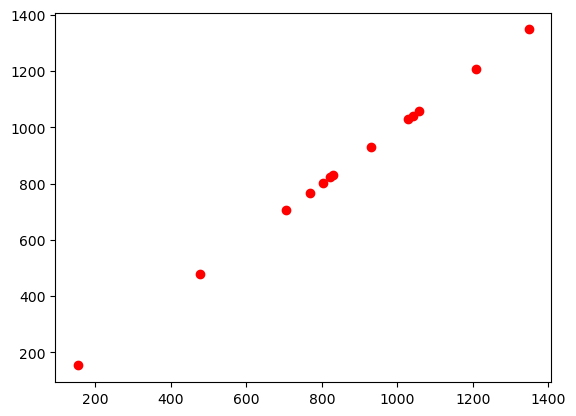

In [20]:
plt.plot(CalcS_Fe3['SCSS_Tot'], CalcS['SCSS_Tot'], 'or')

## Using it with Oneill sulfide composition

In [21]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Oneill=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf="Calc_ONeill", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

In [22]:
CalcS_Oneill.to_clipboard(excel=True)

In [23]:
Liq.to_clipboard(excel=True)

In [24]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Smythe=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf="Calc_Smythe", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

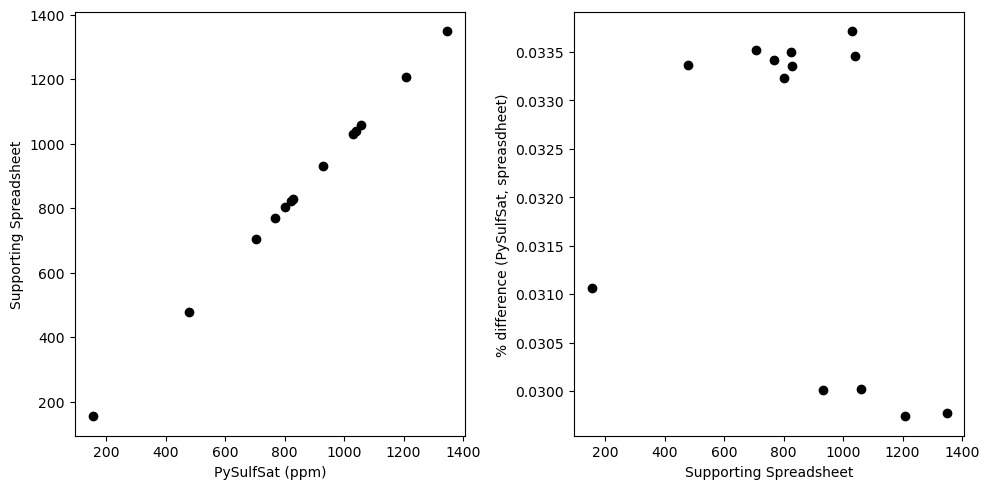

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'], 100-100*CalcS['SCSS_Tot']/Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel('% difference (PySulfSat, spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

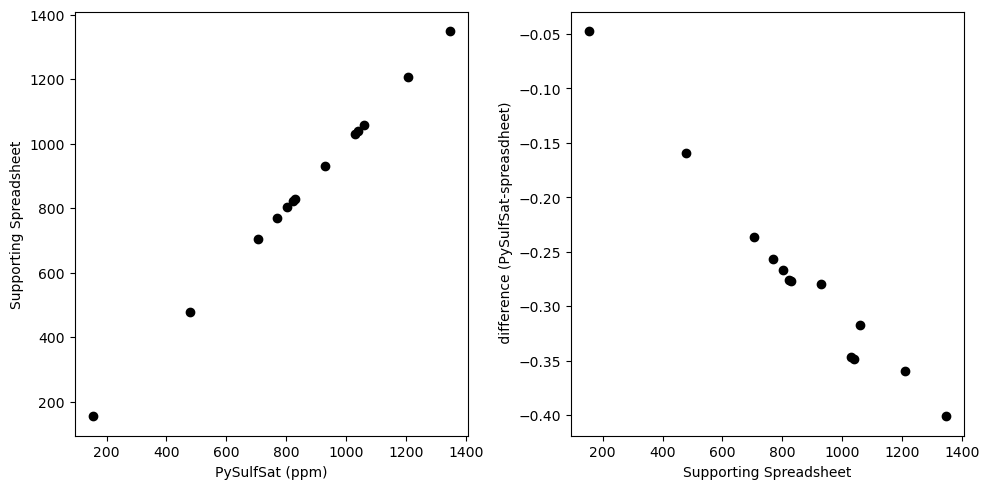

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'],CalcS['SCSS_Tot']-Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel(' difference (PySulfSat-spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

## Changing H2O - doesnt do anything, as normalized

In [27]:
Liq_H2O=Liq.copy()
Liq_H2O['H2O_Liq']=5
CalcS_H2O=ss.calculate_LZ2022_SCSS(df=Liq_H2O, T_K=T_K, P_kbar=P_kbar,  Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,1040.063853,0.999559,0.058107,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,1028.919360,0.928749,0.056223,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,828.809696,0.788135,0.057926,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,801.751233,0.800000,0.058776,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,822.488335,0.800000,0.057736,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN
